https://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/warp_affine/warp_affine.html#warp-affine

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from copy import deepcopy
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter

In [3]:
PROJECT_PATH = os.getcwd().replace("notebooks","")
DATA_PATH = os.path.join(PROJECT_PATH, "data")
SAMPLES_PATH = os.path.join(DATA_PATH, "samples")
TRAIN_SAMPLES_PATH = os.path.join(SAMPLES_PATH, "train")
TEST_SAMPLES_PATH = os.path.join(SAMPLES_PATH, "test")
LABELS_PATH = os.path.join(DATA_PATH, "labels")
TRAIN_LABELS_PATH = os.path.join(LABELS_PATH, "train")
TEST_LABELS_PATH = os.path.join(LABELS_PATH, "test")

In [4]:
img_name = np.random.choice(os.listdir(TRAIN_SAMPLES_PATH))
img_path = os.path.join(TRAIN_SAMPLES_PATH, img_name)
img =  cv2.imread(img_path)

img_label_path = os.path.join(TRAIN_LABELS_PATH, img_name)
img_label = cv2.imread(img_label_path)
print(f"Image shape: {img.shape}, label shape: {img_label.shape}")

Image shape: (512, 512, 3), label shape: (512, 512, 3)


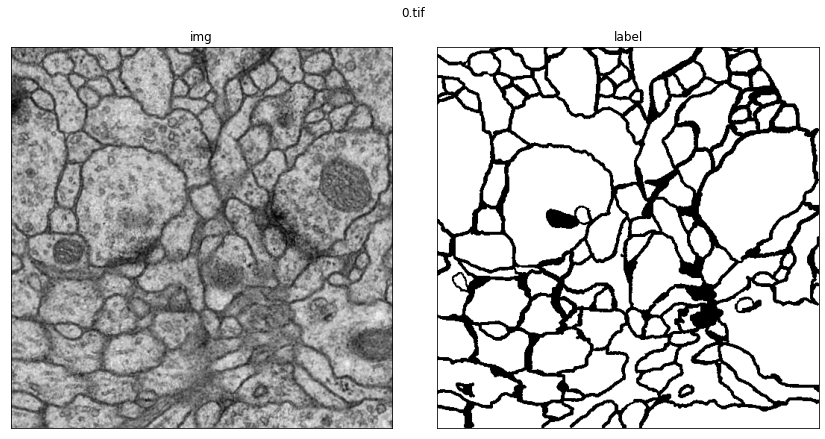

In [5]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
ax1.imshow(img)
ax1.set_title("img")
ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])

ax2.imshow(img_label)
ax2.set_title("label")
ax2.get_xaxis().set_ticks([])
ax2.get_yaxis().set_ticks([])
fig.suptitle(t=img_name, x=.5, y=1.)
plt.tight_layout()
plt.show()

In [18]:
img = img[:500,:400,:]

In [20]:
img.shape

(500, 400, 3)

## Pick 3 points in image space

In [22]:
# find center of image
(rows, cols) = img.shape[:-1]
center_coord = np.float32([rows, cols]) // 2
print("Center coordinates in image space : ", center_coord)

ref_point = min((rows, cols)) // 6 # reference point
print("Reference point in image space : ", ref_point)

Center coordinates in image space :  [250. 200.]
Reference point in image space :  66


Points in image space: (3, 2)


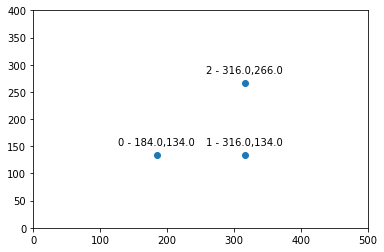

In [23]:
# Affine tranformation will generate transformation matrix when provided with 3 points in original image and 3 points in transformed image
pts_src = np.float32([
    center_coord - ref_point,
    center_coord + np.array([1., -1.]) * ref_point,
    center_coord + ref_point])

print(f"Points in image space: {pts_src.shape}")

plt.scatter(pts_src[:,0], pts_src[:,1])
plt.xlim(0, rows)
plt.ylim(0, cols)

for i, (x, y) in enumerate(pts_src):
    label = f"{i} - {x:.1f},{y:.1f}"

    plt.annotate(label, # this is the text
                 (x, y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0, 10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

## Convert points in image space into points in transformed image space

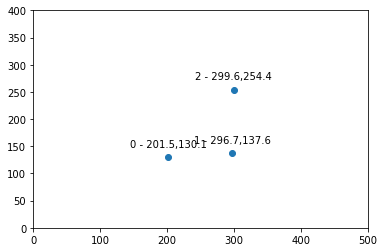

In [24]:
# # Random Affine
alpha_affine = min((rows, cols)) * 0.05
alpha_tranform = np.random.uniform(
    low=-alpha_affine,
    high=alpha_affine,
    size=pts_src.shape).astype(np.float32)

pts_dst = pts_src + alpha_tranform

plt.scatter(pts_dst[:,0], pts_dst[:,1])
plt.xlim(0, rows)
plt.ylim(0, cols)

for i, (x, y) in enumerate(pts_dst):
    label = f"{i} - {x:.1f},{y:.1f}"

    plt.annotate(label, # this is the text
                 (x, y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0, 10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

## Generate M (transformation matrix) to transform points from image space to transformed image space 

In [25]:
# get transformation matrix
M = cv2.getAffineTransform(pts_src, pts_dst)
print(f"Shape of M : {M.shape}")

Shape of M : (2, 3)


In [26]:
a = np.ones((3,3))
a[:,:2] = pts_src
a

array([[184., 134.,   1.],
       [316., 134.,   1.],
       [316., 266.,   1.]])

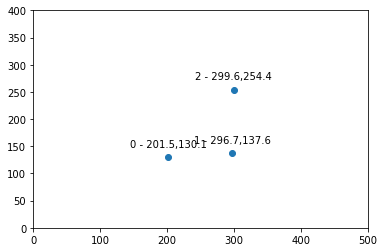

In [27]:
pts_recovered_dst = (M @ a.T).T
plt.scatter(pts_recovered_dst[:,0], pts_recovered_dst[:,1])
plt.xlim(0, rows)
plt.ylim(0, cols)

for i, (x, y) in enumerate(pts_recovered_dst):
    label = f"{i} - {x:.1f},{y:.1f}"

    plt.annotate(label, # this is the text
                 (x, y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0, 10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

In [28]:
trnsf_img = cv2.warpAffine(
    src=img,
    M=M,
    dsize=(cols, rows), 
    borderMode=cv2.BORDER_REFLECT_101)
print(f"\nTransformaed Image shape : {trnsf_img.shape}")


Transformaed Image shape : (500, 400, 3)


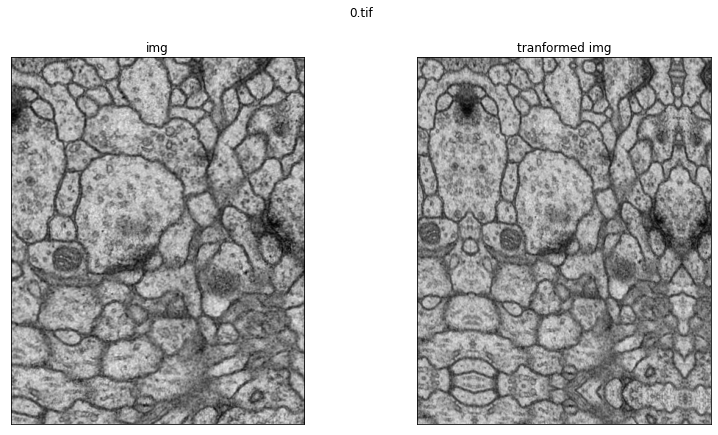

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
ax1.imshow(img)
ax1.set_title("img")
ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])

ax2.imshow(trnsf_img)
ax2.set_title("tranformed img")
ax2.get_xaxis().set_ticks([])
ax2.get_yaxis().set_ticks([])
fig.suptitle(t=img_name, x=.5, y=1.)
plt.tight_layout()
plt.show()